In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#See max columns in a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
# Read the CSV file with specified data types and skipped first 4 rows

vacant_lots_df = pd.read_csv("data/southern_dallas_progress_export_20230906.csv")


In [3]:
#Number of rows


# Get the number of rows
num_rows = vacant_lots_df.shape[0]

#Number of rows once duplicates has been removed
num_rows_duplicates = vacant_lots_df.drop_duplicates(subset=['Parcel ID'])
num_rows_duplicates = num_rows_duplicates.shape[0]


print("Number of rows:", num_rows)
print("Number of rows with duplicates removed:", num_rows_duplicates)

Number of rows: 39645
Number of rows with duplicates removed: 37465


In [4]:
#Number of columns


# Get the number of columns
num_cols = vacant_lots_df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 28


In [5]:
# Remove duplicates based on all columns
vacant_lots_df = vacant_lots_df.drop_duplicates(subset=['Parcel ID'])

In [6]:
#Sum delinquent taxes grouped by "Is Tax Delinquent"

#Uses groupby on Is Tax Delinquent column and sums the Delinquent Taxes
tax_delinquent_group = vacant_lots_df.groupby('Is Tax Delinquent')['Delinquent Taxes'].sum()

#Prints the variable
tax_delinquent_group

Is Tax Delinquent
No         0.00
Yes    37666.99
Name: Delinquent Taxes, dtype: float64

In [7]:
'''
Which Parcel IDs have multiple entries (i.e., show up in the dataset more than once)? 
How many Parcel IDs were duplicated?
'''

# Find duplicate Parcel IDs
duplicate_parcel_ids = vacant_lots_df[vacant_lots_df['Parcel ID'].duplicated(keep = False)]['Parcel ID']

# Get the count of duplicated Parcel IDs
num_duplicate_parcel_ids = duplicate_parcel_ids.nunique()
print("\nNumber of duplicated Parcel IDs:", num_duplicate_parcel_ids)
# Convert duplicate Parcel IDs to a list and print
duplicate_parcel_ids_list = duplicate_parcel_ids.tolist()
#print("Duplicate Parcel IDs:")
#for parcel_id in duplicate_parcel_ids_list:
#    print(parcel_id)




Number of duplicated Parcel IDs: 0


In [29]:
#For all fields, count records with missing data, grouped by council district

#Groups column Council Disricts and then applys lambda function to find counts of null values
missing_data_counts_by_district = vacant_lots_df.groupby('Council District').apply(lambda group: group.isnull().mean())

missing_data_counts_by_district

,Parcel ID,Adddress,Owner,Is Vacant Property,Property Type,Current Use,Year Built,Average Year Built By Council District,Owner Location,Owner Property Count,Public Owner,City or County Owned,Owner is Business,Owner Occupied,Suspected Heir Property,Bank Owned Property,Taxes Delinquent Since,Delinquent Taxes,Is Tax Delinquent,Code Liens - Count,Code Liens - Amount,Zip Code,Zoning,Council District,Vacant Since,Land Size,Unnamed: 26,Unnamed: 27,Owner is Church
Council District,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
District 1,0.0,0.0,0.0,0.0,0.011218,0.0,0.771902,0.0,0.0,0.0,0.958333,0.0,0.0,0.0,0.0,0.0,0.919872,0.919872,0.0,0.913462,0.913462,0.0,0.045406,0.0,0.000000,0.0,1.0,1.0,0.0
District 10,0.0,0.0,0.0,0.0,0.088353,0.0,0.627845,0.0,0.0,0.0,0.937082,0.0,0.0,0.0,0.0,0.0,0.883534,0.883534,0.0,0.977242,0.977242,0.0,0.179384,0.0,0.000000,0.0,1.0,1.0,0.0
District 11,0.0,0.0,0.0,0.0,0.064477,0.0,0.690998,0.0,0.0,0.0,0.956204,0.0,0.0,0.0,0.0,0.0,0.958637,0.958637,0.0,0.978102,0.978102,0.0,0.000000,0.0,0.000000,0.0,1.0,1.0,0.0
District 12,0.0,0.0,0.0,0.0,0.130952,0.0,0.613095,0.0,0.0,0.0,0.961310,0.0,0.0,0.0,0.0,0.0,0.946429,0.946429,0.0,0.997024,0.997024,0.0,0.000000,0.0,0.000000,0.0,1.0,1.0,0.0
District 13,0.0,0.0,0.0,0.0,0.122733,0.0,0.488513,0.0,0.0,0.0,0.983676,0.0,0.0,0.0,0.0,0.0,0.920193,0.920193,0.0,0.980653,0.980653,0.0,0.028416,0.0,0.000000,0.0,1.0,1.0,0.0
District 14,0.0,0.0,0.0,0.0,0.007870,0.0,0.726813,0.0,0.0,0.0,0.951096,0.0,0.0,0.0,0.0,0.0,0.957841,0.957841,0.0,0.960652,0.960652,0.0,0.349073,0.0,0.000000,0.0,1.0,1.0,0.0
District 2,0.0,0.0,0.0,0.0,0.032204,0.0,0.737923,0.0,0.0,0.0,0.956968,0.0,0.0,0.0,0.0,0.0,0.935036,0.935036,0.0,0.913659,0.913659,0.0,0.257912,0.0,0.000000,0.0,1.0,1.0,0.0
District 3,0.0,0.0,0.0,0.0,0.052823,0.0,0.826503,0.0,0.0,0.0,0.949909,0.0,0.0,0.0,0.0,0.0,0.872495,0.872495,0.0,0.894353,0.894353,0.0,0.013206,0.0,0.000455,0.0,1.0,1.0,0.0
District 4,0.0,0.0,0.0,0.0,0.000953,0.0,0.739329,0.0,0.0,0.0,0.887386,0.0,0.0,0.0,0.0,0.0,0.813453,0.813453,0.0,0.705983,0.705983,0.0,0.000762,0.0,0.000000,0.0,1.0,1.0,0.0


In [27]:
vacant_lots_df.groupby('Property Type').size()

Property Type
Land         24605
Structure    11630
dtype: int64

In [28]:
#For all fields, count records with missing data, grouped by property type

#Groups column Council Disricts and then applys lambda function to find counts of null values
missing_data_counts_by_prop_type = vacant_lots_df.groupby('Property Type').apply(lambda group: group.isnull().mean())

missing_data_counts_by_prop_type

,Parcel ID,Adddress,Owner,Is Vacant Property,Property Type,Current Use,Year Built,Average Year Built By Council District,Owner Location,Owner Property Count,Public Owner,City or County Owned,Owner is Business,Owner Occupied,Suspected Heir Property,Bank Owned Property,Taxes Delinquent Since,Delinquent Taxes,Is Tax Delinquent,Code Liens - Count,Code Liens - Amount,Zip Code,Zoning,Council District,Vacant Since,Land Size,Unnamed: 26,Unnamed: 27,Owner is Church
Property Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Land,0.0,0.0,0.0,0.0,0.0,0.0,0.998984,0.000813,0.0,0.0,0.897094,0.0,0.0,0.0,0.0,0.0,0.845397,0.845397,0.0,0.809754,0.809754,0.0,0.187726,0.000813,0.000041,0.0,1.0,1.0,0.0
Structure,0.0,0.0,0.0,0.0,0.0,0.0,0.266810,0.000000,0.0,0.0,0.990284,0.0,0.0,0.0,0.0,0.0,0.927257,0.927257,0.0,0.896819,0.896819,0.0,0.219862,0.000000,0.000000,0.0,1.0,1.0,0.0


In [9]:
# Recode 0 as NA in the "Year Built" column
vacant_lots_df['Year Built'] = np.where(vacant_lots_df['Year Built'] == 0, np.nan, vacant_lots_df['Year Built'])

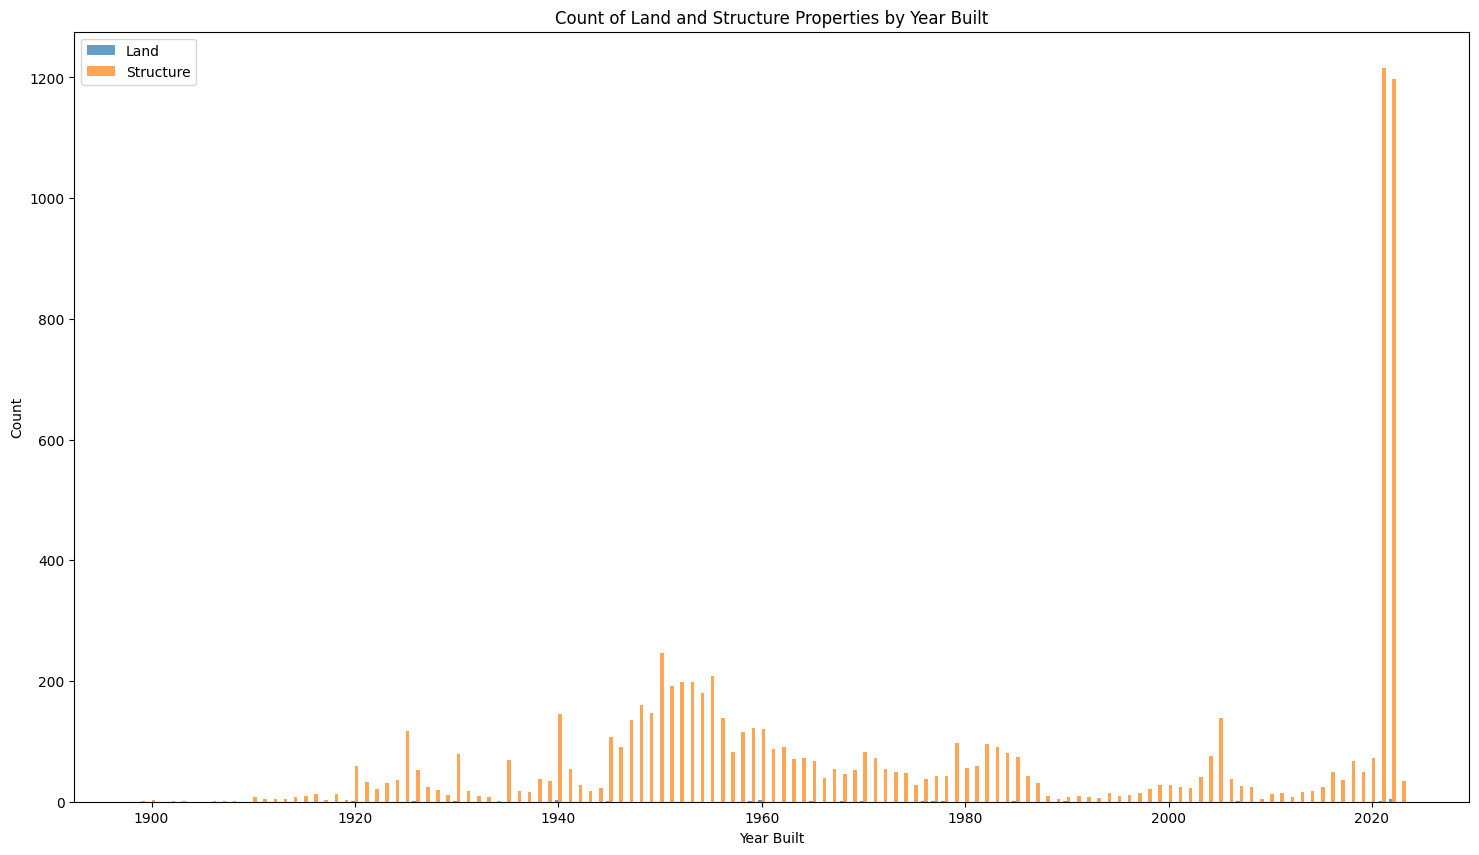

In [10]:

# Filter out rows with Year Built equal to 0, 222, or blanks
filtered_df = vacant_lots_df[(vacant_lots_df['Year Built'] != 0) &
                             (vacant_lots_df['Year Built'] != 222) &
                             (vacant_lots_df['Year Built'].notna())]

# Group the filtered data by 'Year Built' and 'Property Type' and count the occurrences
grouped = filtered_df.groupby(['Year Built', 'Property Type']).size().unstack(fill_value=0)

# Plot the data as a grouped bar chart
width = 0.35  # Width of each bar
x = grouped.index  # Years

fig, ax = plt.subplots(figsize=(18, 10))
land_bars = ax.bar(x - width/2, grouped['Land'], width, label='Land', alpha=0.7)
structure_bars = ax.bar(x + width/2, grouped['Structure'], width, label='Structure', alpha=0.7)

# Customize the plot
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Count of Land and Structure Properties by Year Built')
plt.legend()

# Set custom x-axis and y-axis limits to zoom in
#ax.set_xlim(1960, 2000)  # Example: Zoom in on the range 2000 to 2020 on the x-axis
#ax.set_ylim(0, 100)  # Example: Set the y-axis limit to show counts up to 100

# Show the plot
plt.show()



In [11]:
# Check if "CHURCH" is a partial match in the "Current Use" column and create the "Owner is Church" column
vacant_lots_df['Owner is Church']=vacant_lots_df['Current Use'].str.contains('CHURCH', case=False, na=True)

# Map the True/False values to 'Yes' and 'No' in the "Owner is Church" column
vacant_lots_df['Owner is Church'] = vacant_lots_df['Owner is Church'].map({True: 'Yes', False: 'No'})

owner_is_church=vacant_lots_df["Owner is Church"]

In [12]:
# Define a function to apply the classification logic
def classify_owner(row):
    if pd.notna(row['Public Owner']):
        return row['Public Owner']
    elif row['Public Owner'] == 'City of Dallas':
        return 'City of Dallas'
    elif row['Public Owner'] == 'City of Dallas Housing Authority':
        return 'City of Dallas Housing Authority'
    elif row['Public Owner'] == 'County of Dallas':
        return 'County of Dallas'  
    elif row['Owner is Church'] == 'Yes':
        return 'Church'
    elif row['Owner is Business'] == 'Yes':
        return 'Business'
    elif row['Bank Owned Property'] == 'Yes':
        return 'Bank'
    else:
        return 'Private Owner'

# Apply the function to create the "Owner" column
vacant_lots_df['Owner'] = vacant_lots_df.apply(classify_owner, axis=1)

In [13]:
#Cross tabulation to see counts of all combinations of the following values

columns_to_group = ["Owner", "Owner is Church", "Owner is Business", "Bank Owned Property"]
grouped_counts = vacant_lots_df.groupby(columns_to_group).size().reset_index(name="Count")
grouped_counts


,Owner,Owner is Church,Owner is Business,Bank Owned Property,Count
0,Bank,No,No,Yes,25
1,Business,No,Yes,No,13445
2,Business,No,Yes,Yes,7
3,Church,Yes,No,No,24
4,Church,Yes,Yes,No,11
5,City of Dallas,No,No,No,2613
6,City of Dallas,No,Yes,No,1
7,City of Dallas Housing Authority,No,No,No,17
8,County of Dallas,No,No,No,24
9,Private Owner,No,No,No,21298


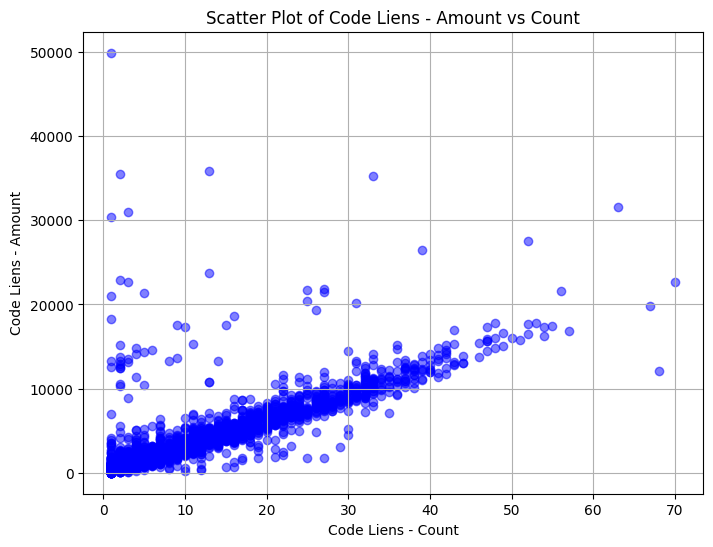

In [14]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
#create scatter plot based on relevant columns,made dot color blue,alpha changes transparency
plt.scatter(vacant_lots_df['Code Liens - Count'], vacant_lots_df['Code Liens - Amount'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Code Liens - Count')
plt.ylabel('Code Liens - Amount')
plt.title('Scatter Plot of Code Liens - Amount vs Count')

# Show the plot
plt.grid(True)
plt.show()

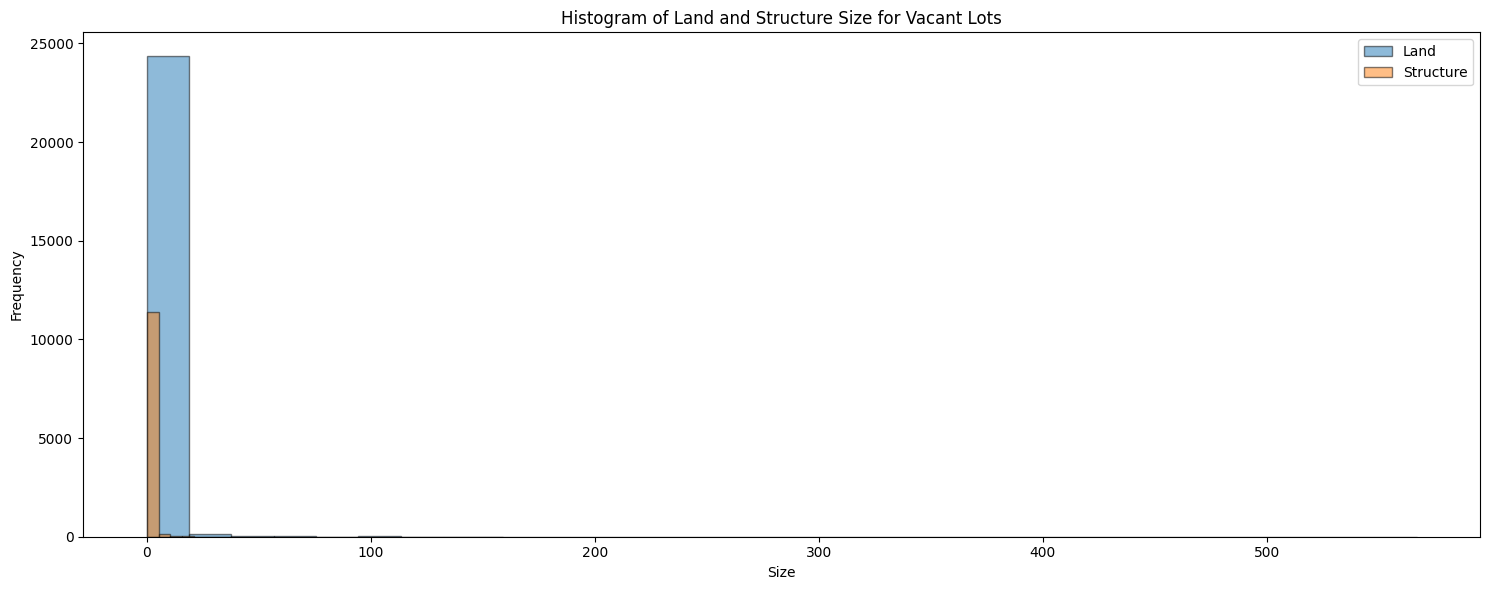

In [15]:
# Filter out rows where 'Property Type' is not NaN
vacant_lots_filtered = vacant_lots_df[vacant_lots_df['Property Type'].notna()]

# Group the data by 'Property Type' and select the 'Land Size' column for each group
grouped_data = vacant_lots_filtered.groupby('Property Type')['Land Size']

# Create histograms for 'Land' and 'Structure' within the same chart
plt.figure(figsize=(15, 6))

for property_type, group_data in grouped_data:
    plt.hist(group_data, bins=30, edgecolor='k', alpha=0.5, label=property_type)

plt.title('Histogram of Land and Structure Size for Vacant Lots')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
#plt.xlim(0,200)  # Change the limits according to your data

plt.tight_layout()
plt.show()

In [16]:
# Take a look at the extremely large property
vacant_lots_filtered[vacant_lots_filtered['Land Size'] > 500]

,Parcel ID,Adddress,Owner,Is Vacant Property,Property Type,Current Use,Year Built,Average Year Built By Council District,Owner Location,Owner Property Count,Public Owner,City or County Owned,Owner is Business,Owner Occupied,Suspected Heir Property,Bank Owned Property,Taxes Delinquent Since,Delinquent Taxes,Is Tax Delinquent,Code Liens - Count,Code Liens - Amount,Zip Code,Zoning,Council District,Vacant Since,Land Size,Unnamed: 26,Unnamed: 27,Owner is Church
23798,818300000000,"2800 MOUNTAIN CREEK PKWY, DALLAS, TX",Private Owner,Yes,Land,C12 - COMMERCIAL - VACANT PLOTTED LOTS/TRACTS ...,NaN,1974.0,Out of State,17,NaN,No,No,No,No,No,NaN,NaN,No,NaN,NaN,75211,Other - PD-186,District 3,2022-04-01,566.754442,NaN,NaN,No


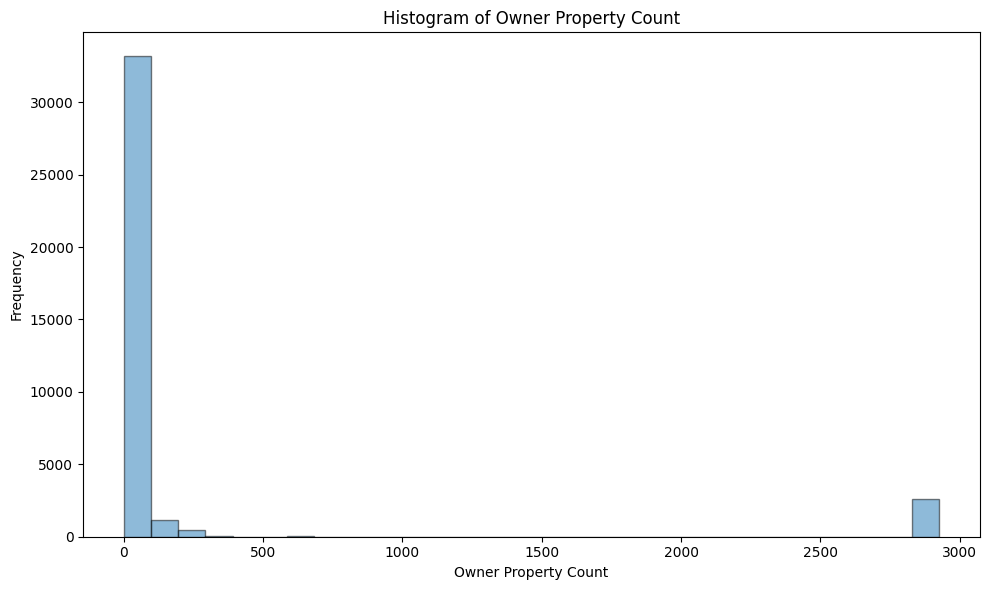

In [18]:
#Histogram of Owner Property Count

# Filter out rows where 'Owner Property Count' is not null
prop_count_filtered_df = vacant_lots_df[vacant_lots_df['Owner Property Count'].notna()]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(prop_count_filtered_df['Owner Property Count'], bins=30, alpha=0.5,edgecolor='black')
plt.xlabel('Owner Property Count')
plt.ylabel('Frequency')
plt.title('Histogram of Owner Property Count')
plt.tight_layout()
plt.show()

In [21]:
prop_count_filtered_df[prop_count_filtered_df['Public Owner'] == "City of Dallas"].shape

(2614, 29)

In [25]:
selected_columns = ["Parcel ID", "Adddress", "Public Owner", "Owner Property Count", "Zip Code", "Zoning", "Vacant Since", "Land Size"]

prop_count_filtered_df[prop_count_filtered_df['Owner Property Count'] > 2000][selected_columns].head(20)






,Parcel ID,Adddress,Public Owner,Owner Property Count,Zip Code,Zoning,Vacant Since,Land Size
2,101995000000,"1913 COMMERCE ST, DALLAS, TX",City of Dallas,2926,75201,Other - PD-619,2022-04-01,0.117204
12,117958000000,"1417 N HASKELL AVE, DALLAS, TX",City of Dallas,2926,75204,Other - PD-298,2022-04-01,0.114358
22,129622000000,"1609 BAYLOR ST, DALLAS, TX",City of Dallas,2926,75226,Other - PD-269,2022-04-01,0.132229
29,141496000000,"2814 HOLMES ST, DALLAS, TX",City of Dallas,2926,75215,NaN,2022-04-01,0.170112
49,153430000000,"1426 MCKENZIE ST, DALLAS, TX",City of Dallas,2926,75223,Residential - D(A)-Duplex,2022-04-01,0.066840
124,207883000000,"5105 COLONIAL AVE, DALLAS, TX",City of Dallas,2926,75215,NaN,2022-04-01,0.023885
159,188026000000,"5004 GOODWIN AVE, DALLAS, TX",City of Dallas,2926,75206,Other - CD-15,2022-04-01,0.116265
167,215824000000,"2806 TROY ST, DALLAS, TX",City of Dallas,2926,75210,NaN,2022-04-01,0.691576
170,216037000000,"4907 S PACIFIC AVE, DALLAS, TX",City of Dallas,2926,75210,NaN,2022-04-01,0.129481
178,219469000000,"5039 MARNE ST, DALLAS, TX",City of Dallas,2926,75215,NaN,2022-04-01,0.105764
